In [210]:
import numpy as np
import pandas as pd



In [211]:
df = pd.read_csv('spamham.csv',encoding='UTF-8')
df.head()


,target,text
0,ham,"Hey Mika, free tmrw after 4:15? Call? 🙂"
1,ham,Can you pick me up at 5:10 from the residence?
2,spam,Barclays: card charged $722.60 at Calgary. If ...
3,ham,"Hey Aisha, free tmrw after 4:45? Walk? 🌮"
4,ham,Uploaded the pics—same folder as before: photo...


In [212]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  50000 non-null  object
 1   text    50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [213]:
# df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],  inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  50000 non-null  object
 1   text    50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [214]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
48559,ham,Upload the deck here: share-photos.test/0we62
34668,spam,Apple Pay: new device added to your wallet. If...
38410,spam,Final notice: parking ticket unpaid. Pay now: ...
20349,spam,Invoice ready for utilities. Scan QR in attach...
28210,spam,Invoice ready for membership. Scan QR in attac...


In [215]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [216]:
df['target']=encoder.fit_transform(df['target'])
df

,target,text
0,0,"Hey Mika, free tmrw after 4:15? Call? 🙂"
1,0,Can you pick me up at 5:10 from the residence?
2,1,Barclays: card charged $722.60 at Calgary. If ...
3,0,"Hey Aisha, free tmrw after 4:45? Walk? 🌮"
4,0,Uploaded the pics—same folder as before: photo...
...,...,...
49995,1,Three: eSIM swap requested. Approve/deny: acti...
49996,0,Got £7.82 cashback. Coffee on me tmrw.
49997,1,You can stop further club tones by replying ST...
49998,1,"Romantic Prague. 2 nights, 2 flights from £154..."


In [217]:
#missing values
df.isnull().sum()

,0
target,0
text,0


In [218]:
#check for duplicatw values
df.duplicated().sum()

np.int64(0)

In [219]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

2.***EDA***

In [220]:
df['target'].value_counts()

,count
target,
0,25000
1,25000


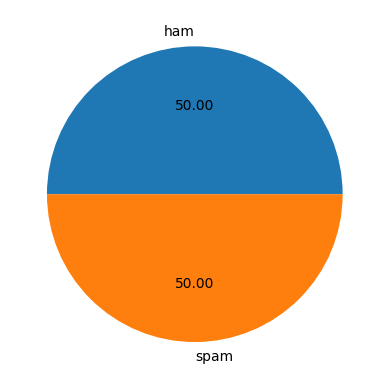

In [221]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [222]:
#data is inbalanced

In [223]:
import nltk


In [224]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [225]:
df['num_characters']=df['text'].apply(len)


In [226]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [227]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [228]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

**dataPreprocessing**

In [229]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# one-time downloads (run once per session)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# tagger name varies by NLTK version; try ENG first then fallback
try:
    nltk.download('averaged_perceptron_tagger_eng')
    TAGGER_NAME = 'averaged_perceptron_tagger_eng'
except:
    nltk.download('averaged_perceptron_tagger')
    TAGGER_NAME = 'averaged_perceptron_tagger'

lemmatizer = WordNetLemmatizer()

def _to_wordnet_pos(treebank_tag):
    """Map NLTK POS tags to WordNet POS (default to noun)."""
    t = treebank_tag[:1].upper()
    return {
        'J': wordnet.ADJ,
        'V': wordnet.VERB,
        'N': wordnet.NOUN,
        'R': wordnet.ADV,
    }.get(t, wordnet.NOUN)

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # POS-tag first, then lemmatize with the right POS
    pos_tags = nltk.pos_tag(text, tagset=None)  # uses the downloaded tagger
    for token, pos in pos_tags:
        y.append(lemmatizer.lemmatize(token, _to_wordnet_pos(pos)))

    return " ".join(y)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [230]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymore tonight k cry enough today'

In [231]:
df['transformed_text']=df['text'].apply(transform_text)

In [232]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [233]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

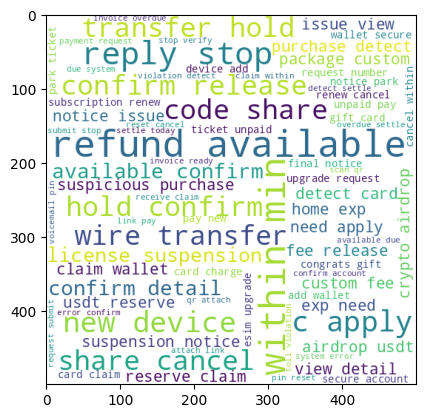

In [234]:
plt.imshow(spam_wc)

In [235]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

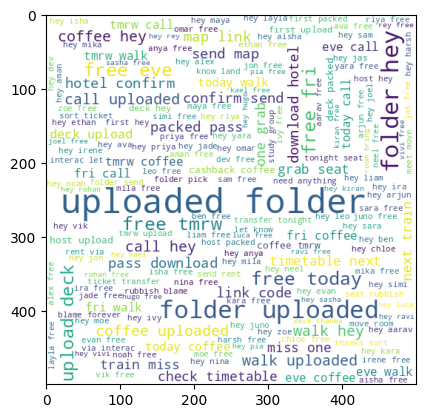

In [236]:
plt.imshow(ham_wc)

In [237]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [238]:
len(spam_corpus)

164880

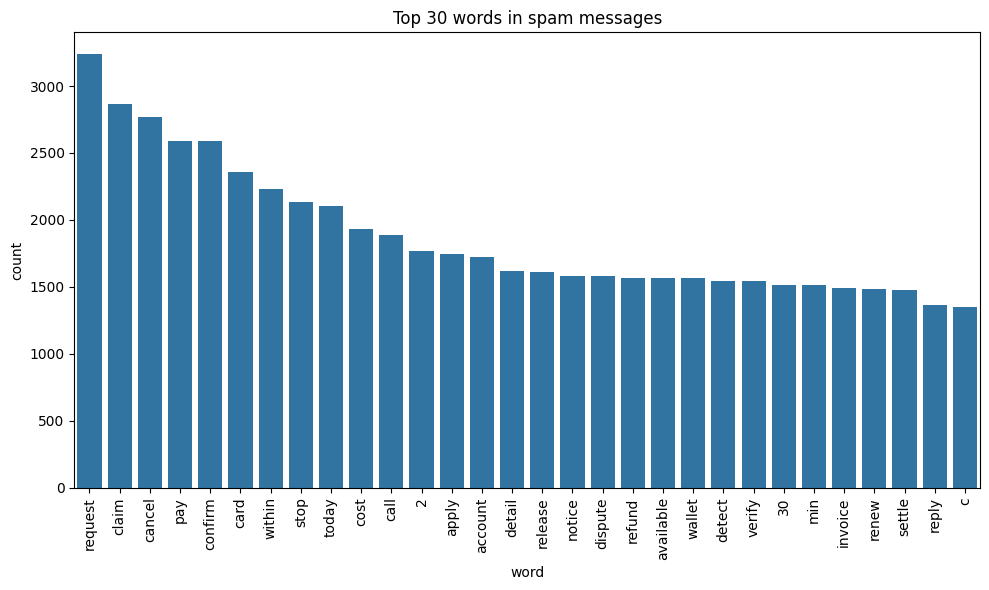

In [239]:
from collections import Counter

import seaborn as sns


# build a tidy DataFrame
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30),
                         columns=['word', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(data=word_freq, x='word', y='count', errorbar=None)
plt.xticks(rotation=90)
plt.title("Top 30 words in spam messages")
plt.tight_layout()
plt.show()

**modelBuilding**

In [240]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [241]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [242]:
y = df['target'].values

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [245]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier

In [246]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [247]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [248]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [249]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [250]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [251]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 1.0
Precision 1.0


In [252]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model-2.pkl','wb'))